### plot timings of vis-r models
Models are run with command.sh in examples dir, but are done by hand for the image model

In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mc_fs = glob.glob('../examples/vis-r-emc_1gauss/*as.txt')
mc_fs.sort()
st_fs = glob.glob('../examples/vis-r-stn_1gauss/*as.txt')
st_fs.sort()
im_fs = glob.glob('../examples/gauss_3d_img/*as.txt')
im_fs.sort()

In [3]:
def get_as_time(file):
    # return execution tim
    with open(file, 'r') as f:
        t = f.readline()
    scale = float(os.path.basename(file)[0])
    if scale == 0:
        scale = 9
    return scale, float(t.strip().replace('real ',''))

In [4]:
ms = 8

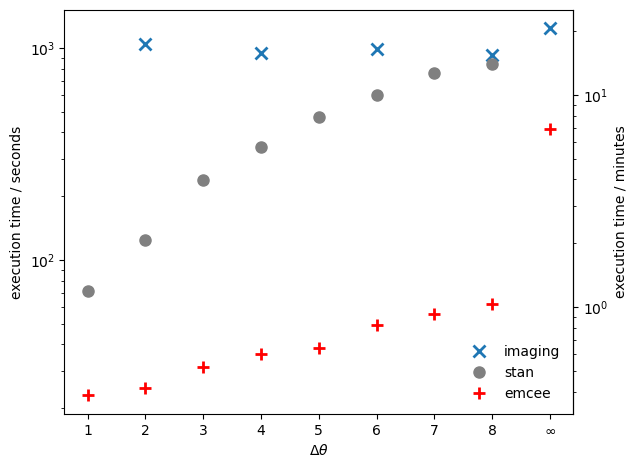

In [5]:
fig, ax = plt.subplots()

ax.plot([get_as_time(f)[0] for f in im_fs],
        [get_as_time(f)[1] for f in im_fs],
        'x', label='imaging', markersize=ms, mew=2)
ax.plot([get_as_time(f)[0] for f in st_fs],
        [get_as_time(f)[1] for f in st_fs],
        'o', label='stan', markersize=ms, color='grey')
ax.plot([get_as_time(f)[0] for f in mc_fs],
        [get_as_time(f)[1] for f in mc_fs],
        '+', label='emcee', markersize=ms, mew=2, color='red')

# x = np.arange(8)+1
# ax.plot(x, 20*x**1)

secax = ax.secondary_yaxis('right', functions=(lambda x: x/60, lambda x: x*60))
secax.set_ylabel('execution time / minutes')

ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('$\\Delta \\theta$')
ax.set_ylabel('execution time / seconds')

ax.set_xticks(np.arange(1,10), [1,2,3,4,5,6,7,8,'$\\infty$'])

fig.tight_layout()
fig.savefig('../doc/timing.png')